# Quick visualisations of the data

<b>First we should pip install the below modules if we haven't already </b>

In [1]:
#!pip install wordcloud
#!pip install google-cloud-storage
#!pip install gcsfs
#!pip install wordsegment

<b>Importing dependencies </b>

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import os
import pandas as pd
import re
import json
import html
import wordsegment as ws
from wordsegment import load, segment
import seaborn as sns

<b> Loading in training data for HatEval </b>

In [5]:
train = pd.read_csv('Raw_Data/hateval2019/hateval2019_en_train.csv', sep=',',  index_col = False, encoding = 'utf-8')
dev =  pd.read_csv('Raw_Data/hateval2019/hateval2019_en_dev.csv', sep=',',  index_col = False, encoding = 'utf-8')
frames = [train,dev]
data = pd.concat(frames)
data.rename(columns={'text': 'tweet', 'HS': 'label'}, inplace=True)
cols = ['TR', 'AG']
data.drop(cols, inplace = True, axis = 1)
pd.set_option('display.max_colwidth', -1) # Set col width to -1 so we can see entire text column
data.loc[data['label'] == 0, 'label'] = "Not Hate"
data.loc[data['label'] == 1, 'label'] = "Hate"
data.head()

id  \
0  201   
1  202   
2  203   
3  204   
4  205   

                                                                                                                                                                                                                                                                                                          tweet  \
0  Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike                                                                                                                                                                                      
1  Why would young fighting age men be the vast majority of the ones escaping a war &amp; not those who cannot fight like women, children, and the elderly?It's because the majority of the refugees are not actually refugees they are economic migrants trying to get into Europe.... https://t.co/Ks0SHbtYqn   
2  @KamalaHarris Illegals Dump their Kids at the border like Road Kill and Refuse to Unite! They Hope they get Amnesty, Free Education and Welfare Illegal #FamilesBelongTogether in their Country not on the Taxpayer Dime Its a SCAM #NoDACA #NoAmnesty #SendThe                                                
3  NY Times: 'Nearly All White' States Pose 'an Array of Problems' for Immigrants https://t.co/ACZKLhdMV9 https://t.co/CJAlSXCzR6                                                                                                                                                                                 
4  Orban in Brussels: European leaders are ignoring the will of the people, they do not want migrants https://t.co/NeYFyqvYlX                                                                                                                                                                                     

      label  
0  Hate      
1  Hate      
2  Hate      
3  Not Hate  
4  Not Hate

<b> Text Pre-processing functions </b>

In [6]:
%cd Text_Preprocessing
import preprocessing as pre
%cd ..
data['tweet'] = data['tweet'].apply(pre.emojiReplace)
data['tweet'] = data['tweet'].apply(pre.preprocess)
data['tweet'] = data['tweet'].apply(pre.hashtagSegment)

data.head()

C:\Users\fionn\Documents\CSC3002_Project\CSC3002_Detecting_Hate_Speech_On_Social_Media\csc3002_detecting_hate_speech\Text_Preprocessing
C:\Users\fionn\Documents\CSC3002_Project\CSC3002_Detecting_Hate_Speech_On_Social_Media\csc3002_detecting_hate_speech


id  \
0  201   
1  202   
2  203   
3  204   
4  205   

                                                                                                                                                                                                                                                                                tweet  \
0  hurray, saving us $$$ in so many ways multuser lock them up build the wall end daca boycott nfl boycott nike                                                                                                                                                                         
1  why would young fighting age men be the vast majority of the ones escaping a war and not those who cannot fight like women, children, and the elderly?it's because the majority of the refugees are not actually refugees they are economic migrants trying to get into europe....   
2  user illegals dump their kids at the border like road kill and refuse to unite! they hope they get amnesty, free education and welfare illegal familes belong together in their country not on the taxpayer dime its a scam no daca no amnesty send the                              
3  ny times: 'nearly all white' states pose 'an array of problems' for immigrants                                                                                                                                                                                                       
4  orban in brussels: european leaders are ignoring the will of the people, they do not want migrants                                                                                                                                                                                   

      label  
0  Hate      
1  Hate      
2  Hate      
3  Not Hate  
4  Not Hate

<b> Simple functions that perform quick visualisations of the data. We can either plot a bar chart side by side for a binary comparison of hate speech vs non hate speech in the dataset in terms of numbers.

We also have a word cloud function which tells us the most common terms in the data</b>

In [17]:
def plot_data(df, class_name):
    color = ['cornflowerblue', 'lightcoral']
    ax = df[class_name].value_counts().plot(kind='bar',
                                                    figsize=(12, 8), color = color)
    ax.set_title("Class Distribution").set_fontsize(20)
    ax.set_ylabel('Amount of tweets', fontsize = 12)
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                
                
                tick.label.set_rotation('horizontal')
    total = 0
    for p in ax.patches:
        total += p.get_height()
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    bbox=dict(facecolor='yellow', alpha=0.5))

        ax.annotate(str(np.round(p.get_height() / total * 100, decimals=2)) + "%",
                    (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                    ha='center', va='center', xytext=(0, -20), textcoords='offset points',
                    bbox=dict(facecolor='gray', alpha=0.5))


def plot_word_cloud(df):
    text = df.tweet.values
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


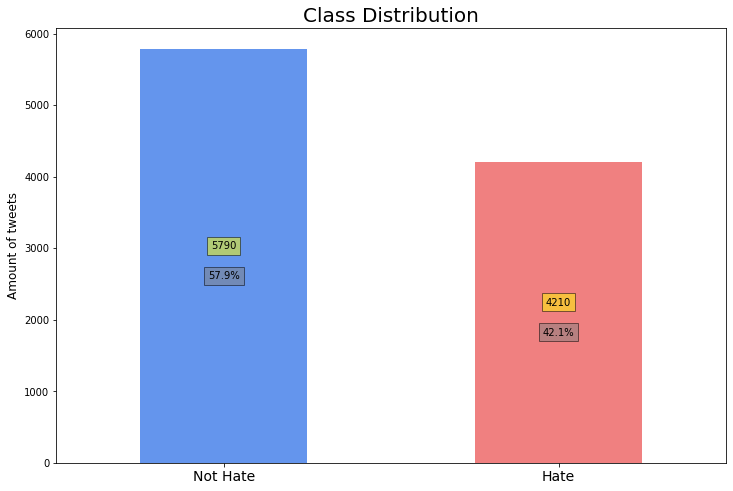

In [18]:
plot_data(data, "label")

In [19]:
NoHate = data[(data['label'] == 'Not Hate')]
Hate = data[(data['label'] == 'Hate')]

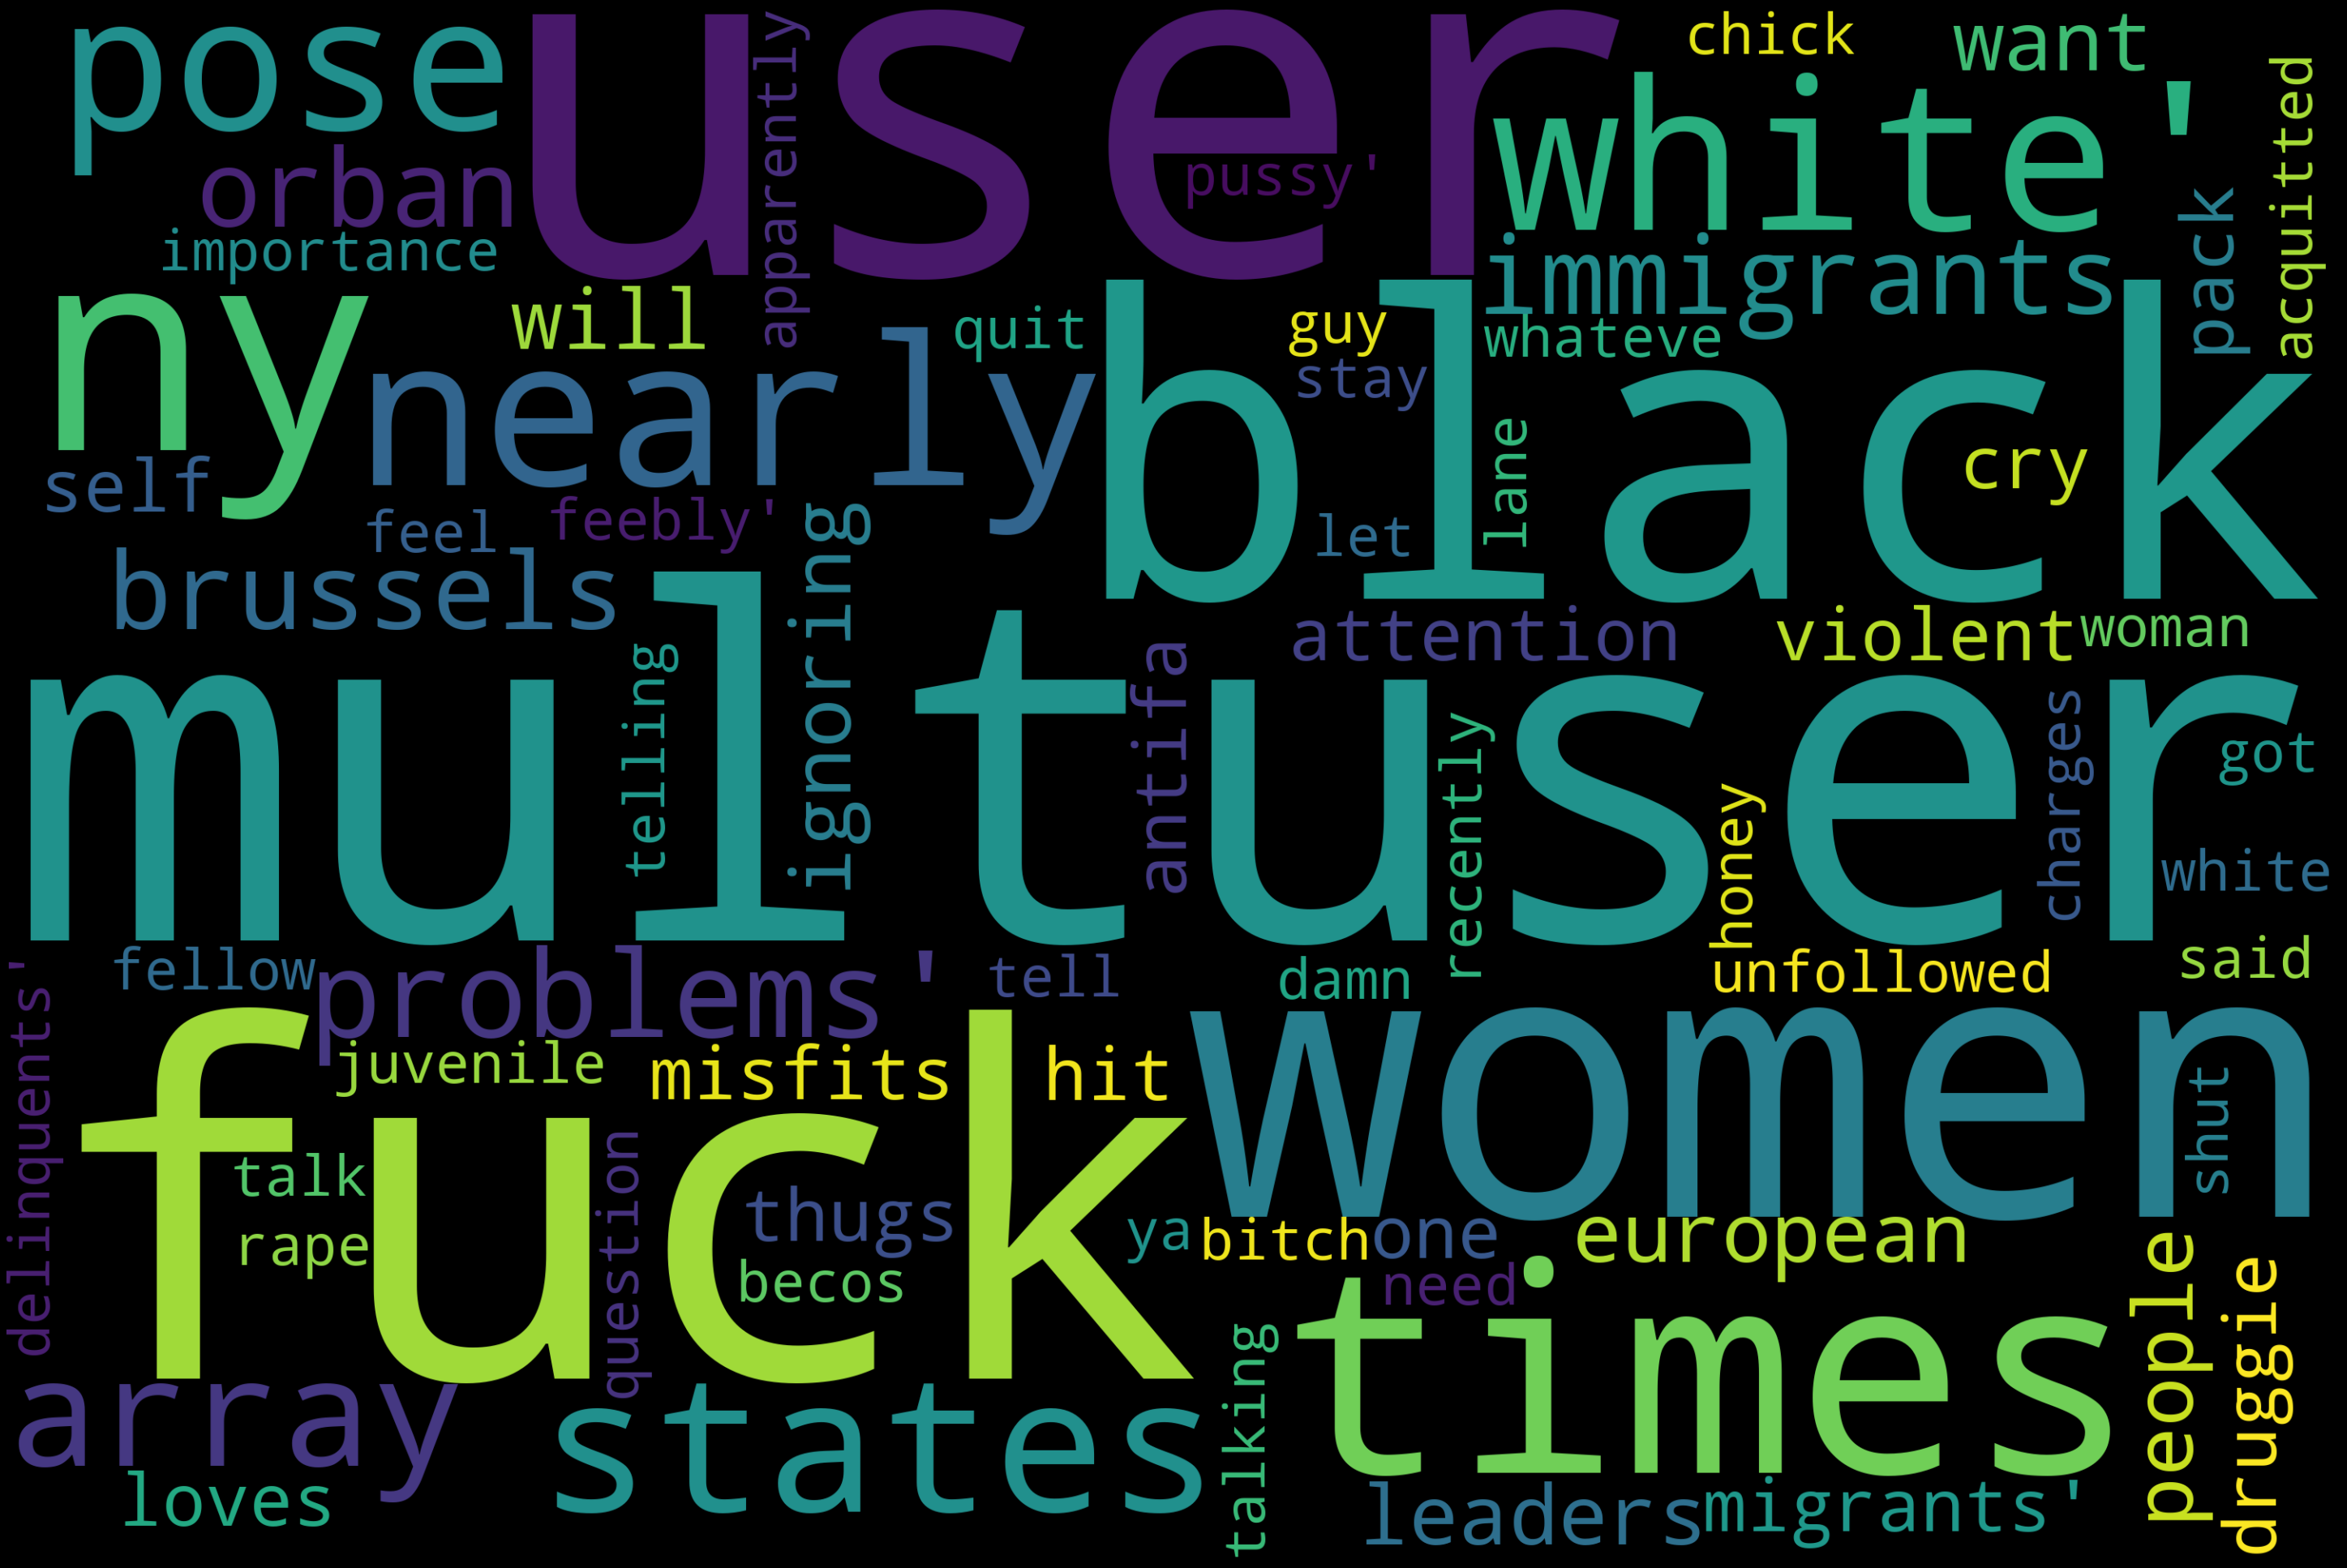

In [20]:
plot_word_cloud(NoHate)

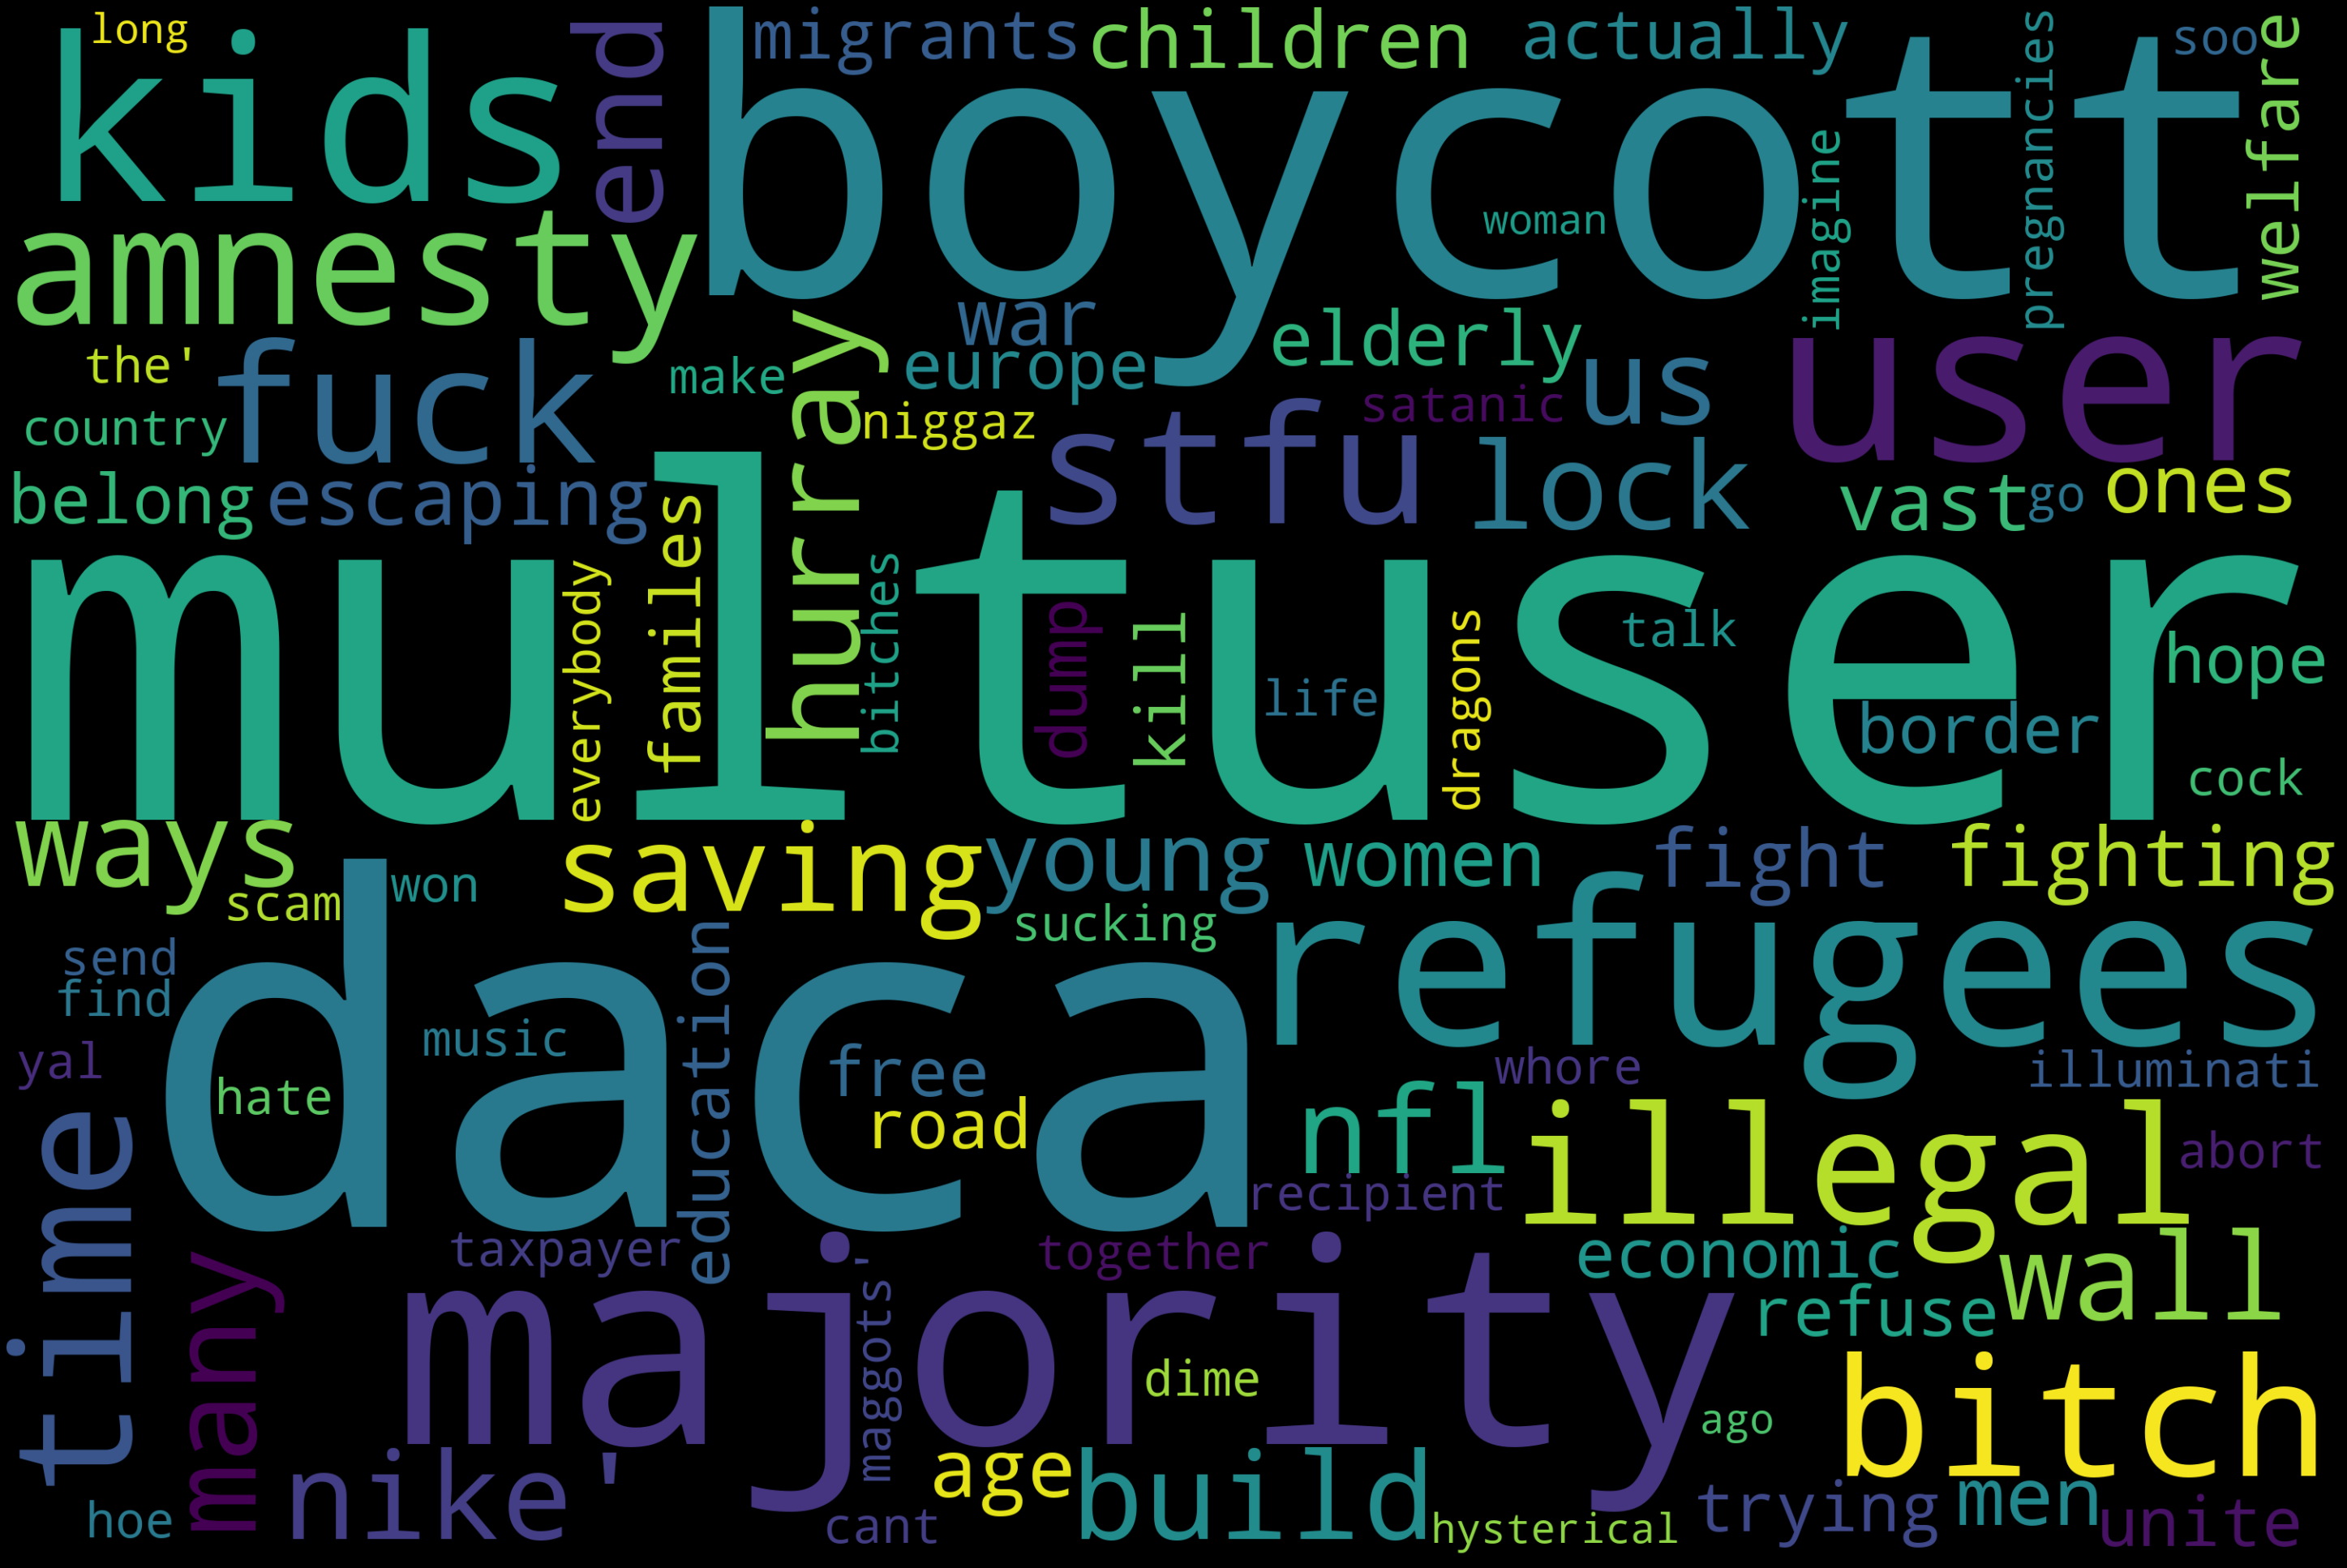

In [21]:
plot_word_cloud(Hate)

Getting access to GCS bucket so we can view evaluationresults.

<i>These results are stored in a remote location because they are dynamically changed </i>

In [26]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "C:/Users/fionn/Downloads/storageCreds.json"
from google.cloud import storage
storage_client = storage.Client()
buckets = list(storage_client.list_buckets())
print("If access has been granted, then below should say \"[Bucket: csc3002>]\"")
print(buckets) # Testing if access to GCS has been granted

If access has been granted, then below should say "[Bucket: csc3002>]"
[<Bucket: csc3002>]


<b>Loading in dataset comparing different methods of text pre-processing </b>

In [27]:
preprocdat = pd.read_csv('gs://csc3002/hateval2019/preprocess_eval_df.csv', sep=',',  index_col = 0, encoding = 'utf-8')
preprocdat.dropna(inplace = True)
preprocdat

Accuracy  F1 Score  \
Basic                                       76.370000  0.727456   
ReplaceEmoji                                77.903333  0.740020   
ReplaceEmoji_v2                             77.625000  0.741741   
Hashtag Segmentation                        78.252500  0.746762   
Remove Punctuation                          77.550000  0.735776   
Lemmatize Text                              76.538333  0.725722   
Remove Stopwords                            74.083333  0.692779   
Hastag Seg + Punc Remove + EmojiReplace_v2  77.709167  0.735121   
Hastag Seg + EmojiReplace_v2                77.332499  0.732261   
hash_v1                                     0.783175   0.748646   

                                            False Negatives  False Positives  \
Basic                                       48.530000        45.990000         
ReplaceEmoji                                42.263333        46.123333         
ReplaceEmoji_v2                             43.920000        45.580000         
Hashtag Segmentation                        39.500000        47.490000         
Remove Punctuation                          42.700000        47.100000         
Lemmatize Text                              45.460000        48.386667         
Remove Stopwords                            51.027778        52.638889         
Hastag Seg + Punc Remove + EmojiReplace_v2  43.783333        45.380000         
Hastag Seg + EmojiReplace_v2                44.170000        46.500000         
hash_v1                                     39.020000        47.710000         

                                            Precision    Recall  \
Basic                                       0.711958   0.711770   
ReplaceEmoji                                0.733583   0.748993   
ReplaceEmoji_v2                             0.742242   0.739116   
Hashtag Segmentation                        0.732840   0.765444   
Remove Punctuation                          0.731632   0.746545   
Lemmatize Text                              0.719198   0.730200   
Remove Stopwords                            0.699014   0.697092   
Hastag Seg + Punc Remove + EmojiReplace_v2  0.734783   0.740007   
Hastag Seg + EmojiReplace_v2                0.729349   0.737943   
hash_v1                                     0.733675   0.768395   

                                                        Training Time  \
Basic                                       0 days 00:06:02.896088370   
ReplaceEmoji                                0 days 00:05:32.472314      
ReplaceEmoji_v2                             0 days 00:05:31.309126      
Hashtag Segmentation                        0 days 00:05:59.213520      
Remove Punctuation                          0 days 00:05:54.590594      
Lemmatize Text                              0 days 00:05:26.026977      
Remove Stopwords                            0.003977828                 
Hastag Seg + Punc Remove + EmojiReplace_v2  0 days 00:05:29.927581      
Hastag Seg + EmojiReplace_v2                0 days 00:05:40.551040      
hash_v1                                     0 days 00:05:25.421199      

                                            True Negatives  True Positives  \
Basic                                       185.600000      119.880000       
ReplaceEmoji                                185.480000      126.133333       
ReplaceEmoji_v2                             186.030000      124.470000       
Hashtag Segmentation                        184.100000      128.910000       
Remove Punctuation                          184.460000      125.740000       
Lemmatize Text                              183.086667      123.066667       
Remove Stopwords                            178.916667      117.416667       
Hastag Seg + Punc Remove + EmojiReplace_v2  186.206667      124.630000       
Hastag Seg + EmojiReplace_v2                184.970000      124.360000       
hash_v1                                     183.830000      129.440000       

                         

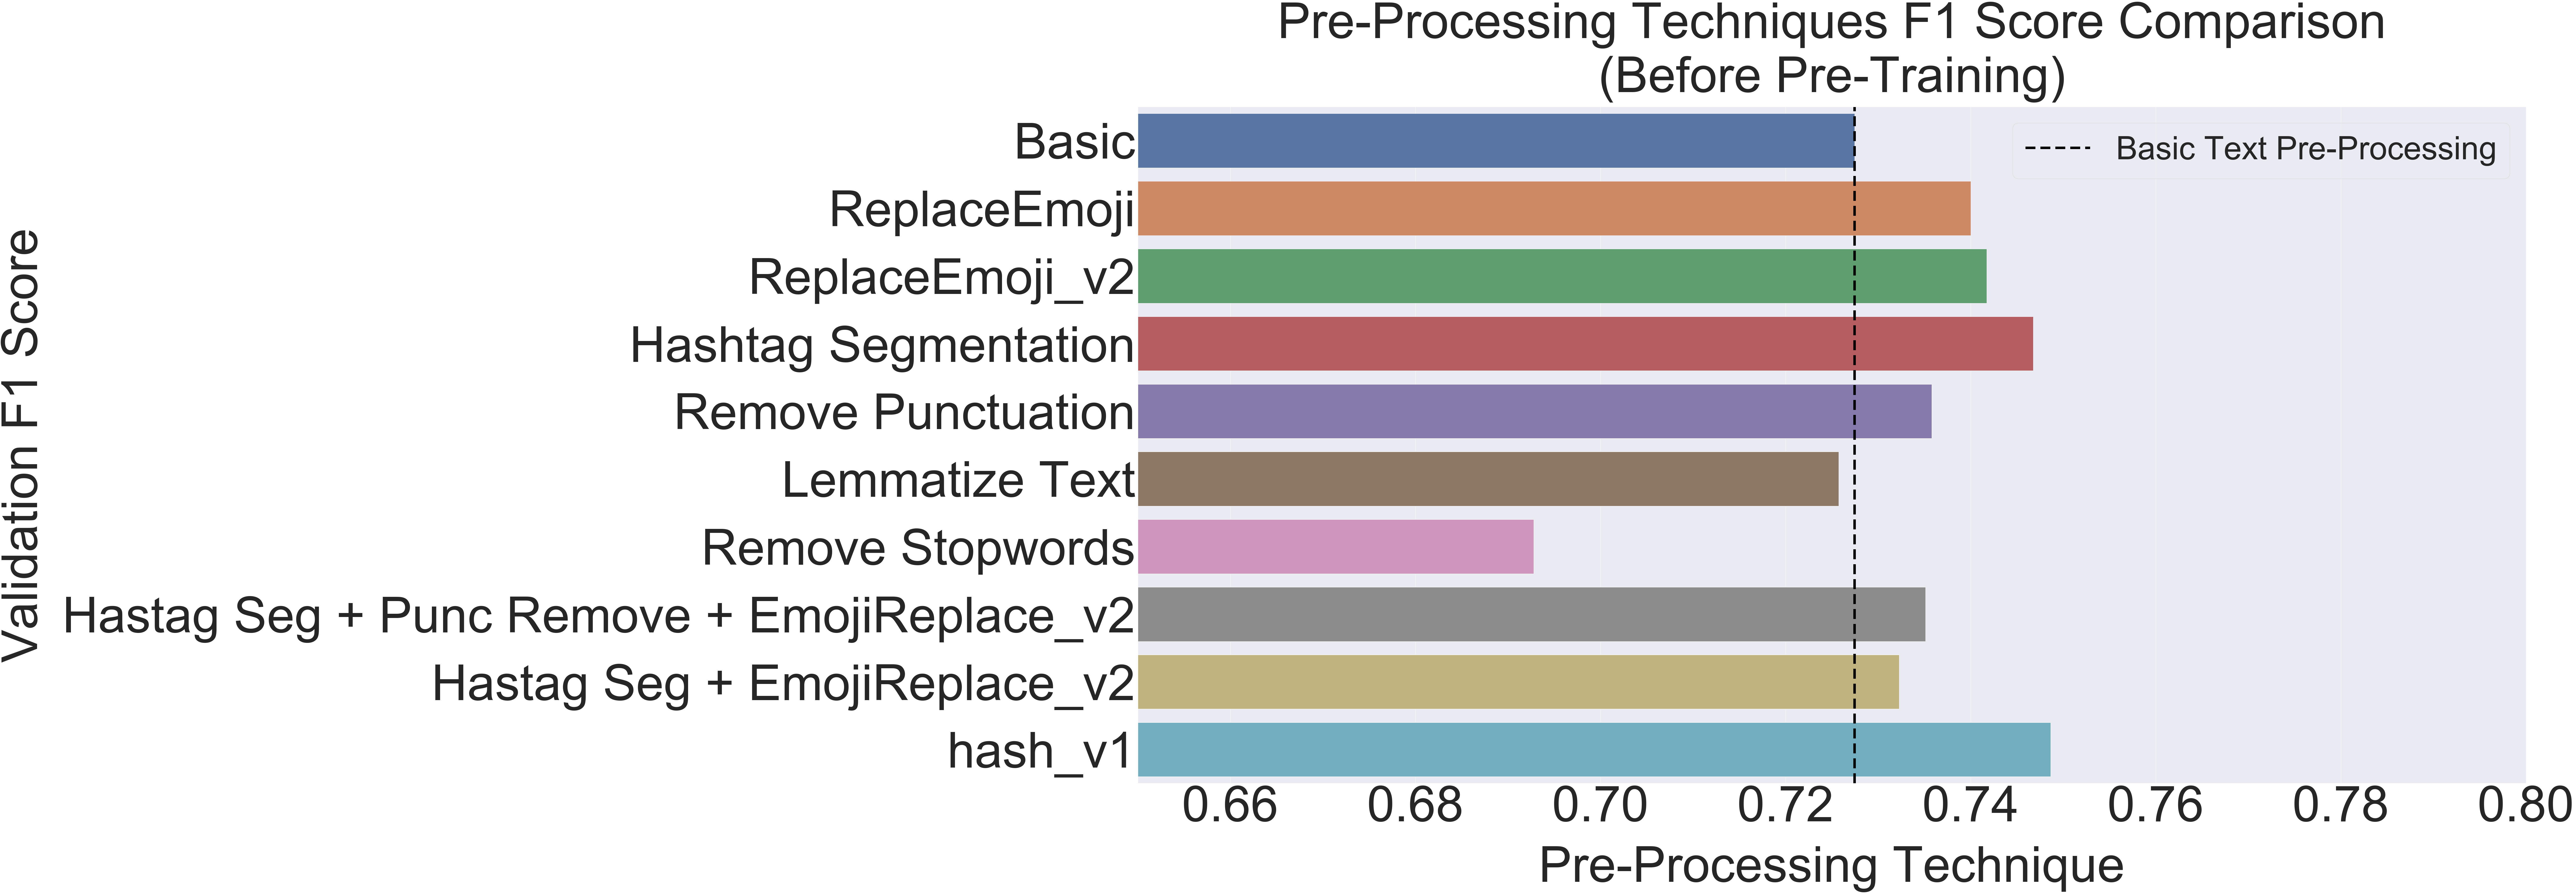

In [37]:
sns.set(style = "darkgrid")
ax = sns.barplot(y = preprocdat.index, x ="F1 Score",\
                  data = preprocdat)
titleSize = 200
tickSize = 150
padSize = 60
plt.title("Pre-Processing Techniques F1 Score Comparison\n(Before Pre-Training)", \
          fontsize = titleSize, pad =padSize )

plt.ylabel("Validation F1 Score", fontsize = titleSize, labelpad =padSize)
plt.xlabel("Pre-Processing Technique", fontsize = titleSize, labelpad =padSize)
plt.xticks(fontsize = titleSize)
plt.yticks(fontsize = titleSize)
plt.xlim(0.65, 0.8)
plt.rcParams["figure.figsize"] = (100,50)

threshold = preprocdat.loc['Basic']['F1 Score']
ax.axvline(threshold, 0,1, label='Basic Text Pre-Processing', color = "black",\
            linestyle = "--", lw = 10.0, dashes = [4,2])
ax.legend(prop = {'size': 130})

#Save figure
#fig = ax.get_figure()
#fig.savefig('output.png', bbox_inches ='tight') 

If the above figure doesn't format correctly on the first run then run the cell again.It should right itself

<b>Loading in dataset comparing different steps of further pre-training:</b>
    
The first dataset was further pre-trained with a learning rate of 5e-5. The other was further-pretrained with a learning rate of 2e-5

In [38]:
pretraindat = pd.read_csv('gs://csc3002/hateval2019/pretraining_eval_df.csv', sep=',',  index_col = 0, encoding = 'utf-8')
pretraindat.index = (pretraindat.index/1000).astype(int)
pretraindat

F1 Score       auc  Accuracy  False Negatives  False Positives  \
120  0.763358  0.798466  0.803061  38.20            39.00             
100  0.764554  0.795330  0.798469  37.08            41.92             
80   0.767475  0.796891  0.798265  35.00            44.08             
60   0.758429  0.783174  0.788163  41.16            41.88             
40   0.748400  0.775228  0.781429  43.80            41.88             
0    0.725141  0.731132  0.748469  62.44            36.16             

     Precision    Recall              Training Time  True Negatives  \
120  0.766623   0.769235  0.004281233                187.40           
100  0.755519   0.775787  0 days 00:05:30.002256     184.60           
80   0.749522   0.788458  0 days 00:05:30.042791     182.44           
60   0.720442   0.751278  0 days 00:05:41.106568     184.64           
40   0.715475   0.735362  0 days 00:06:17.175884     184.64           
0    0.593161   0.622031  0 days 00:05:28.497110440  190.36           

     True Positives  
120  127.40          
100  128.40          
80   130.48          
60   124.32          
40   121.68          
0    103.04

In [39]:
pretraindat1 = pd.read_csv('gs://csc3002/hateval2019/pretraining_eval_df1.csv', sep=',',  index_col = 0, encoding = 'utf-8')
pretraindat1.index = [120, 100, 80,60,40, 0]
pretraindat1.index = pretraindat1.index.astype(int)
pretraindat1

F1 Score       auc  Accuracy  False Negatives  False Positives  \
120  0.765190  0.795195  0.797245  36.0000          43.4800           
100  0.768301  0.798551  0.800200  35.6800          44.2400           
80   0.768081  0.799007  0.801600  36.6000          42.7600           
60   0.767117  0.797896  0.800300  36.6200          43.2600           
40   0.757157  0.789982  0.793500  39.1125          43.4875           
0    0.725141  0.731132  0.748469  62.4400          36.1600           

     Precision    Recall              Training Time  True Negatives  \
120  0.750553   0.782374  0 days 00:05:34.251366640  183.04           
100  0.751556   0.788115  0 days 00:06:09.480712     187.36           
80   0.756257   0.782642  0 days 00:05:50.962482     188.84           
60   0.754029   0.782588  0 days 00:05:39.230519     188.32           
40   0.749598   0.767707  0.003935796                188.15           
0    0.593161   0.622031  0 days 00:05:28.497110440  190.36           

     True Positives  
120  129.48          
100  132.72          
80   131.80          
60   131.80          
40   129.25          
0    103.04

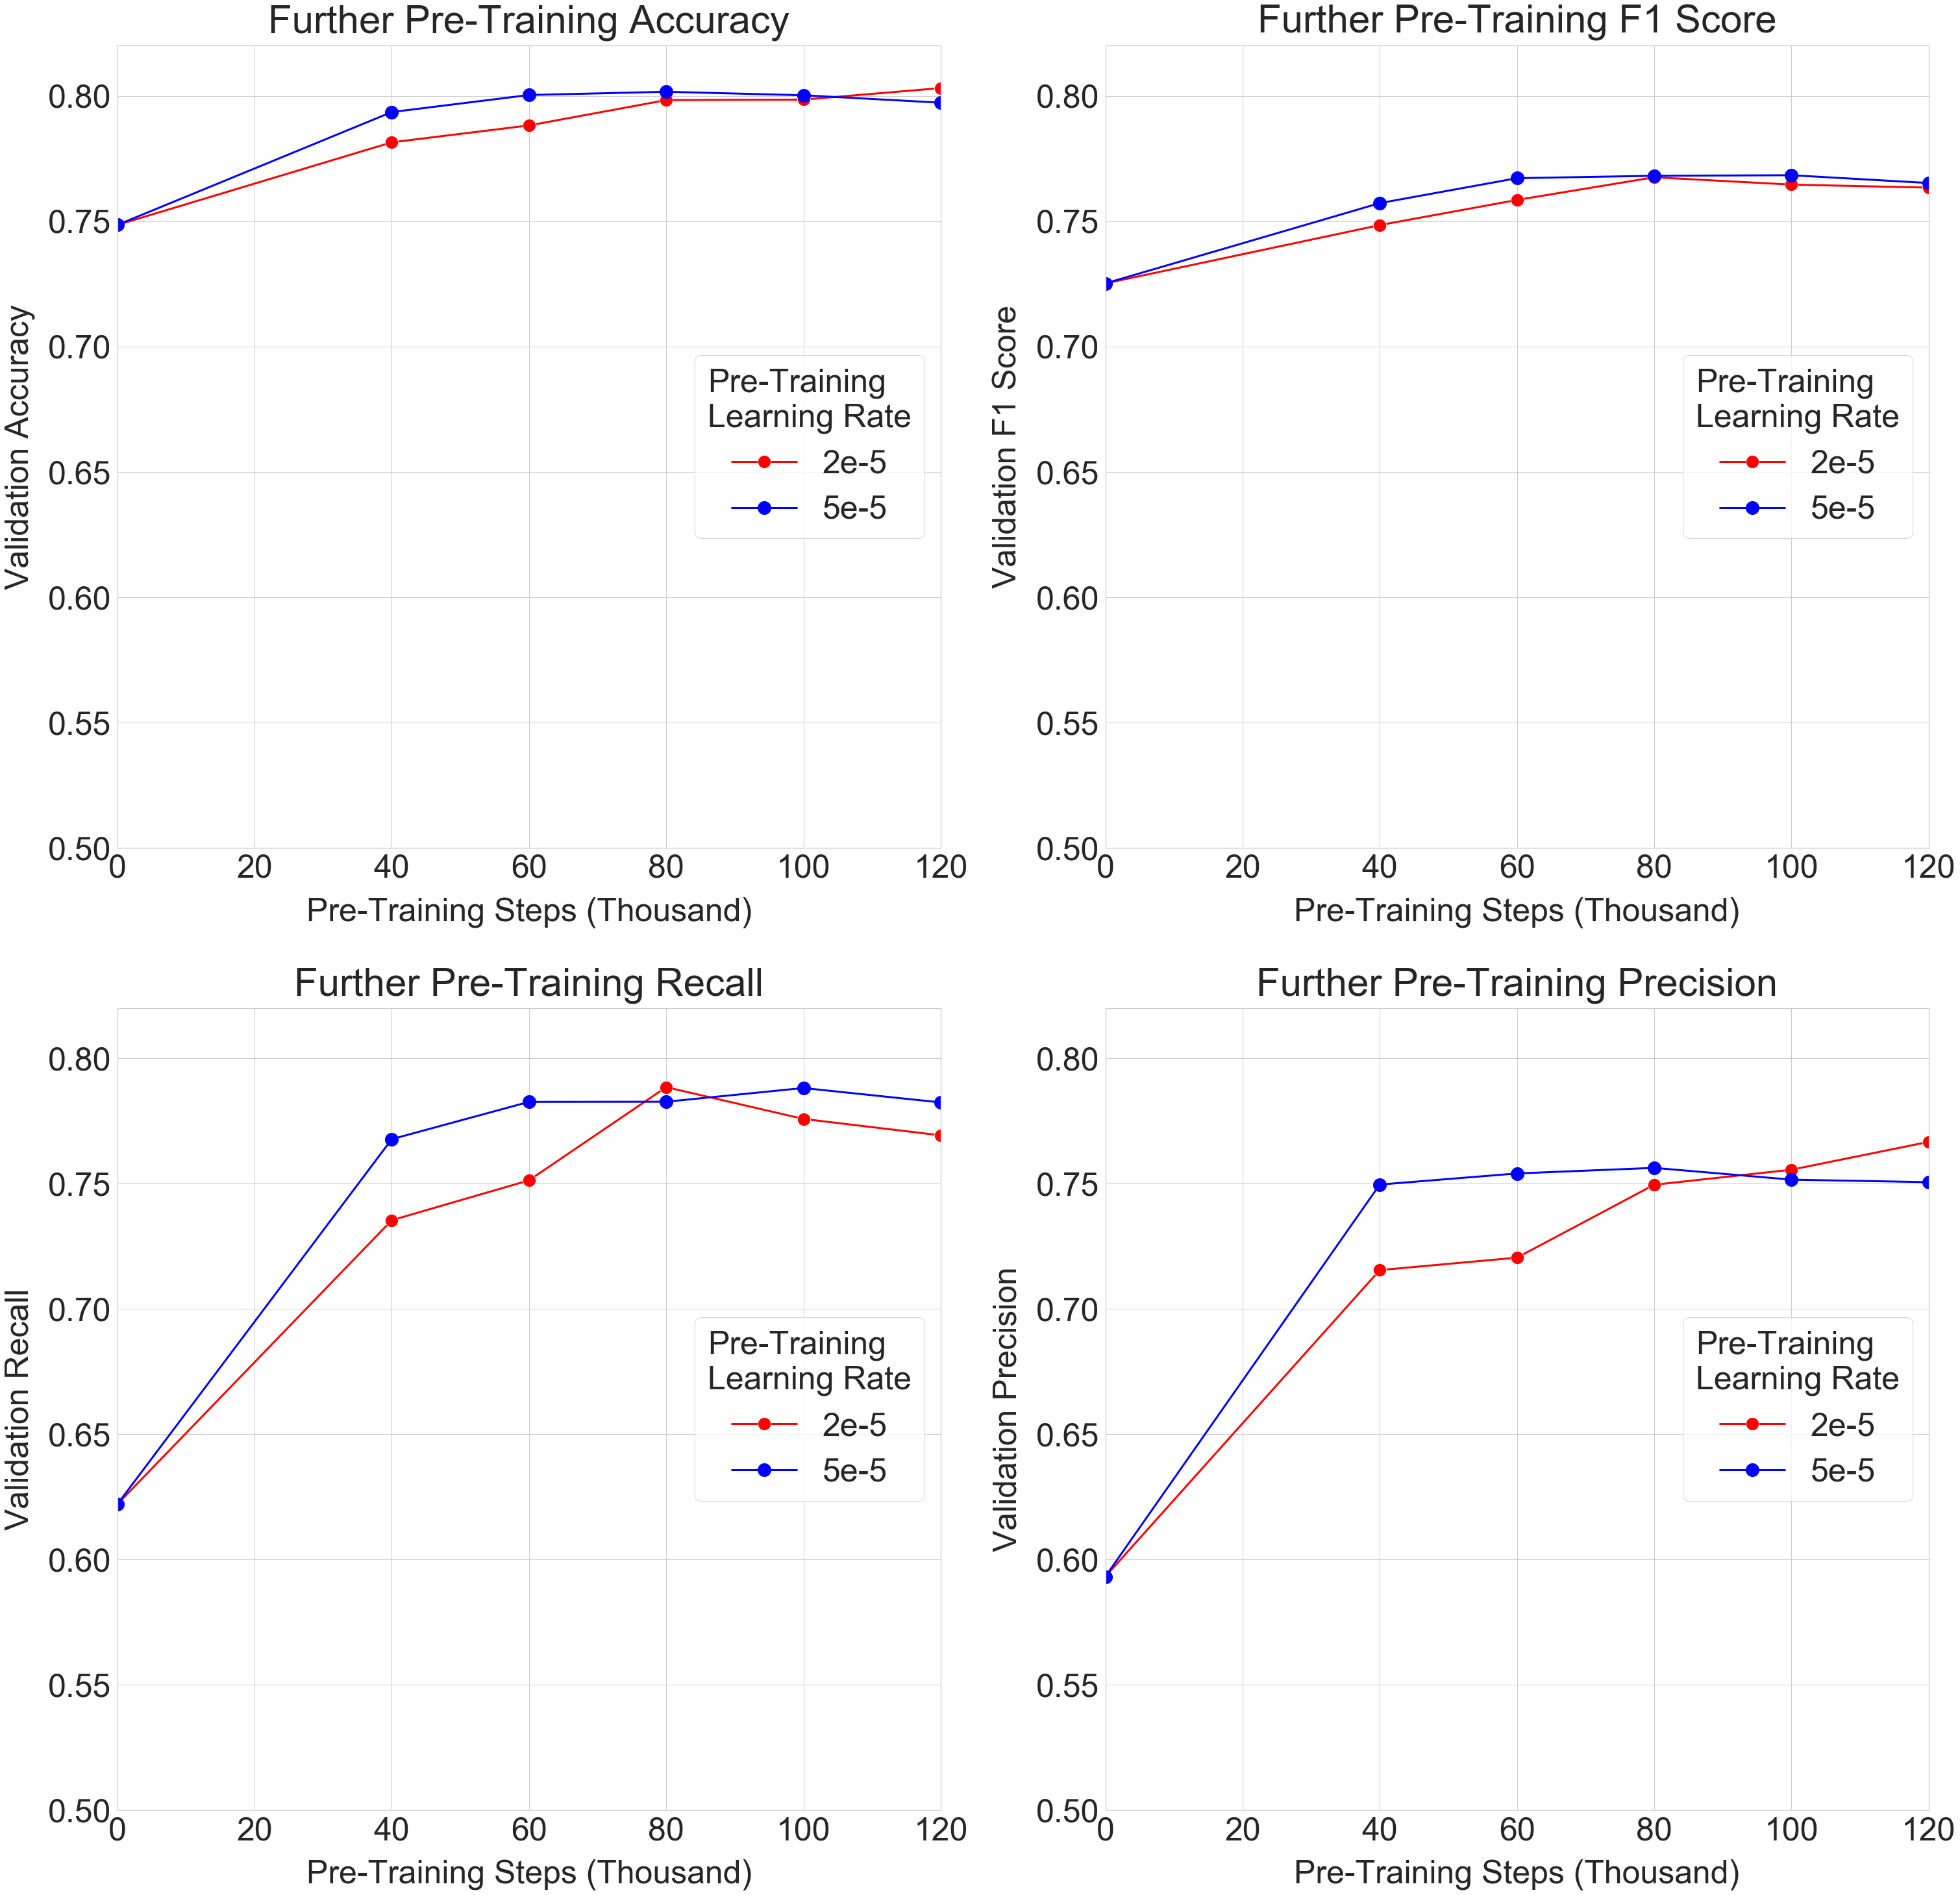

In [41]:
sns.set(style = 'whitegrid', \
        rc={'figure.figsize':(50,50), "lines.linewidth": 3, \
            'lines.markersize': 20, 'xtick.labelsize': 50, 'ytick.labelsize': 50,\
           'axes.titlesize': 60, 'axes.labelsize': 50, 'axes.labelpad': 20,\
           'legend.title_fontsize': 50, 'legend.loc': 'center right', \
            'legend.fontsize': 'large'})

padsize = 20
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
for i in range(1,len(metrics) + 1):
    plt.subplot(2,2,i)
    ax = sns.lineplot(x = pretraindat.index, y = metrics[i-1],\
                      data = pretraindat, marker = 'o', color = 'red')
    plt.title("Further Pre-Training " + metrics[i-1] , pad =padsize)
    plt.ylabel("Validation " + metrics[i-1], labelpad =padsize)
    plt.xlabel("Pre-Training Steps (Thousand)",labelpad =padsize)
    ax.set_ylim(0.5, 0.82)
    ax.set_xlim(0, 130)
    pretraindat1[metrics[i-1]].plot(ax = ax, marker = 'o', color = 'blue')
    ax.legend(labels = ['2e-5', '5e-5'], title = 'Pre-Training\nLearning Rate', \
              prop = {'size': 50})
#fig = ax.get_figure()
#fig.savefig('output.png', bbox_inches ='tight') 
plt.show()

In [42]:
noRemTerms = pd.read_csv('gs://csc3002/hateval2019/noRemTerms_eval_df.csv', sep=',',  index_col = 0, encoding = 'utf-8')
noRemTerms.index = [120, 100, 80,60,40,0]
noRemTerms.index = noRemTerms.index.astype(int)
noRemTerms

F1 Score       auc  Accuracy  False Negatives  False Positives  \
120  0.771988  0.803006  0.806225  36.62            40.89             
100  0.775150  0.805582  0.808800  36.16            40.32             
80   0.784265  0.803073  0.806625  36.95            40.40             
60   0.775507  0.805577  0.808550  35.92            40.66             
40   0.769353  0.800061  0.803000  36.80            42.00             
0    0.725141  0.731132  0.748469  62.44            36.16             

     Precision    Recall              Training Time  True Negatives  \
120  0.764466   0.782570  0 days 00:06:35.564023     190.69           
100  0.767534   0.785265  0 days 00:05:37.702464     191.28           
80   0.766138   0.780577  0.003896215                191.20           
60   0.766980   0.786737  0 days 00:06:38.178697     190.90           
40   0.759145   0.781462  0 days 00:06:10.201610     189.60           
0    0.593161   0.622031  0 days 00:05:28.497110440  190.36           

     True Positives  
120  131.80          
100  132.24          
80   131.45          
60   132.52          
40   131.60          
0    103.04

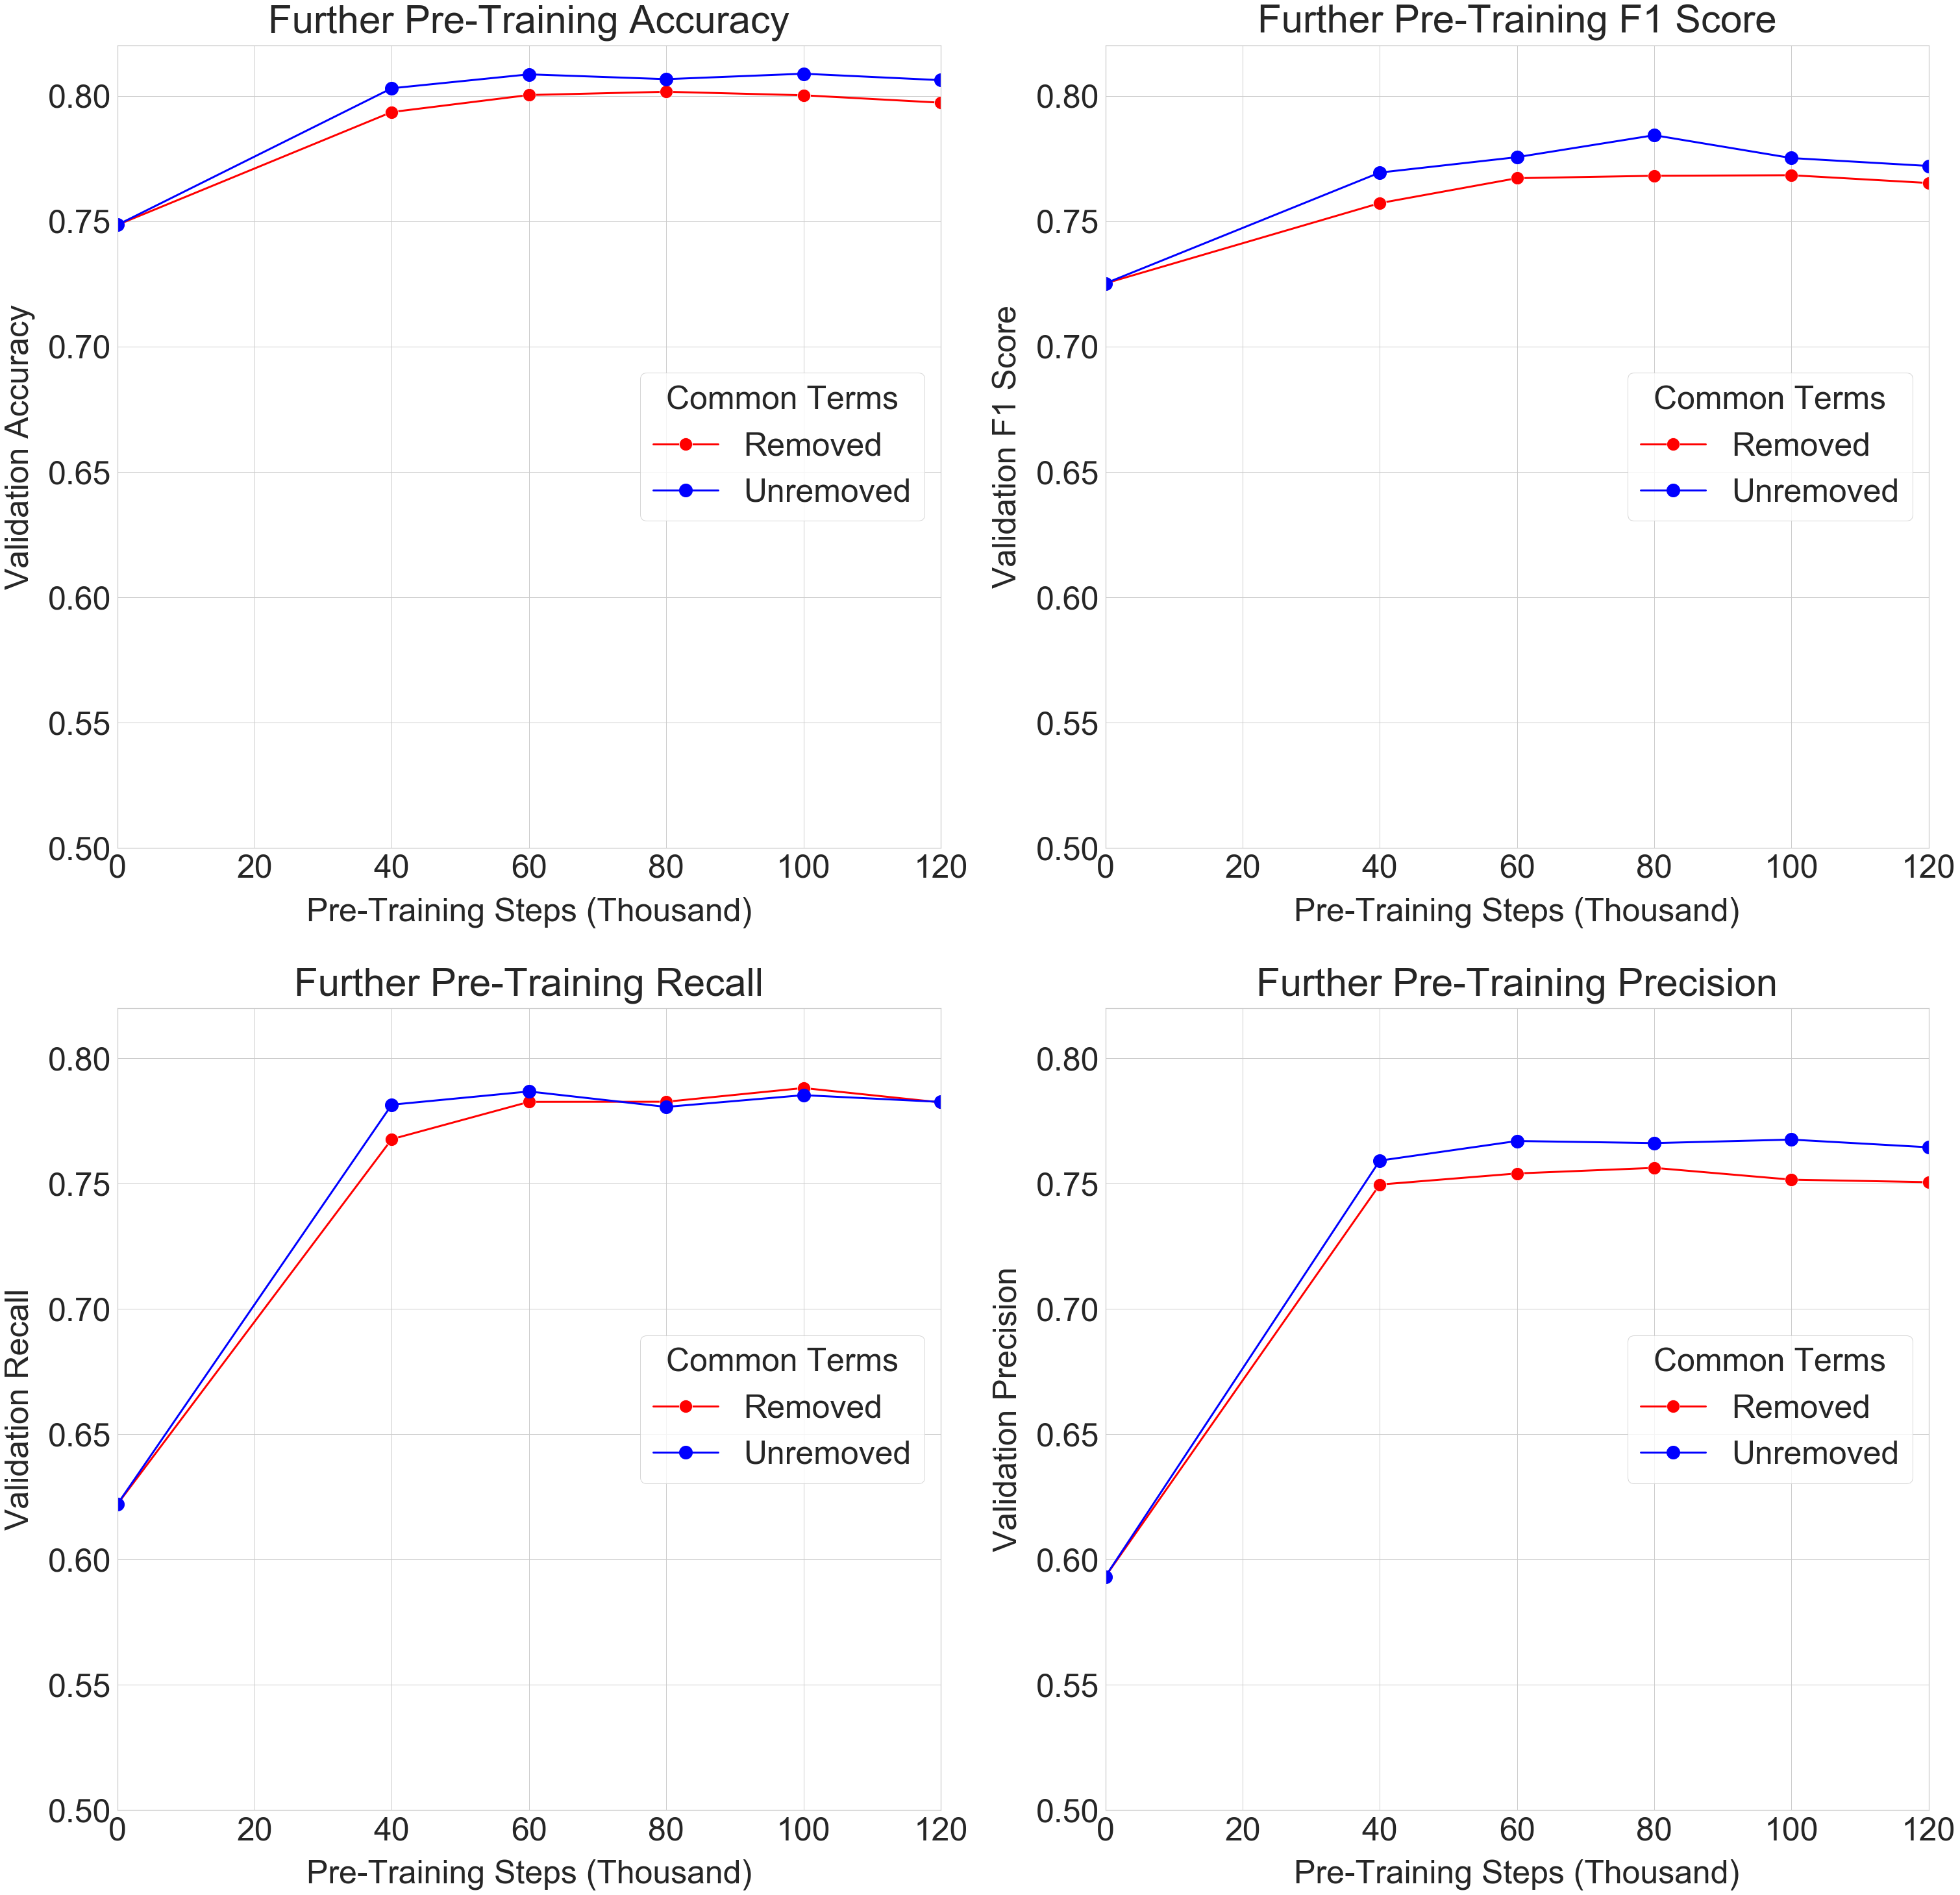

In [44]:
for i in range(1,len(metrics) + 1):
    plt.subplot(2,2,i)
    ax = sns.lineplot(x = pretraindat1.index, y = metrics[i-1],\
                      data = pretraindat1, marker = 'o', color = 'red')
    plt.title("Further Pre-Training " + metrics[i-1] , pad =padsize)
    plt.ylabel("Validation " + metrics[i-1], labelpad =padsize)
    plt.xlabel("Pre-Training Steps (Thousand)",labelpad =padsize)
    plt.ylim(0.5, 0.82)
    plt.xlim(0, 130)
    noRemTerms[metrics[i-1]].plot(ax = ax, marker = 'o', color = 'blue')
    ax.legend(labels = ['Removed', 'Unremoved'], \
              title = 'Common Terms' ,prop = {'size': 50})
    
#fig = ax.get_figure()
#fig.savefig('output.png', bbox_inches ='tight')

plt.show()

In [45]:
emoj = pd.read_csv('gs://csc3002/hateval2019/emojiReplacev2_eval_df.csv', sep=',',  index_col = 0, encoding = 'utf-8')
emoj.index = [120, 100, 80, 60,40, 0]
emoj.index = emoj.index.astype(int)
emoj

F1 Score       auc  Accuracy  False Negatives  False Positives  \
120  0.771481  0.801423  0.803300  35.44            43.24             
100  0.768644  0.798993  0.801200  36.20            43.32             
80   0.773589  0.802567  0.803000  33.72            45.08             
60   0.767041  0.797590  0.799800  36.44            43.64             
40   0.768217  0.798880  0.801125  36.25            43.30             
0    0.725141  0.731132  0.748469  62.44            36.16             

     Precision    Recall              Training Time  True Negatives  \
120  0.755624   0.789551  0 days 00:05:32.180641     188.36           
100  0.754275   0.785031  0 days 00:06:32.344663880  188.28           
80   0.750535   0.799769  0 days 00:05:43.747153     186.52           
60   0.753509   0.783597  0 days 00:05:42.780247     187.96           
40   0.754268   0.784694  0 days 00:05:35.112138     188.33           
0    0.593161   0.622031  0 days 00:05:28.497110440  190.36           

     True Positives  
120  132.96          
100  132.20          
80   134.68          
60   131.96          
40   132.12          
0    103.04

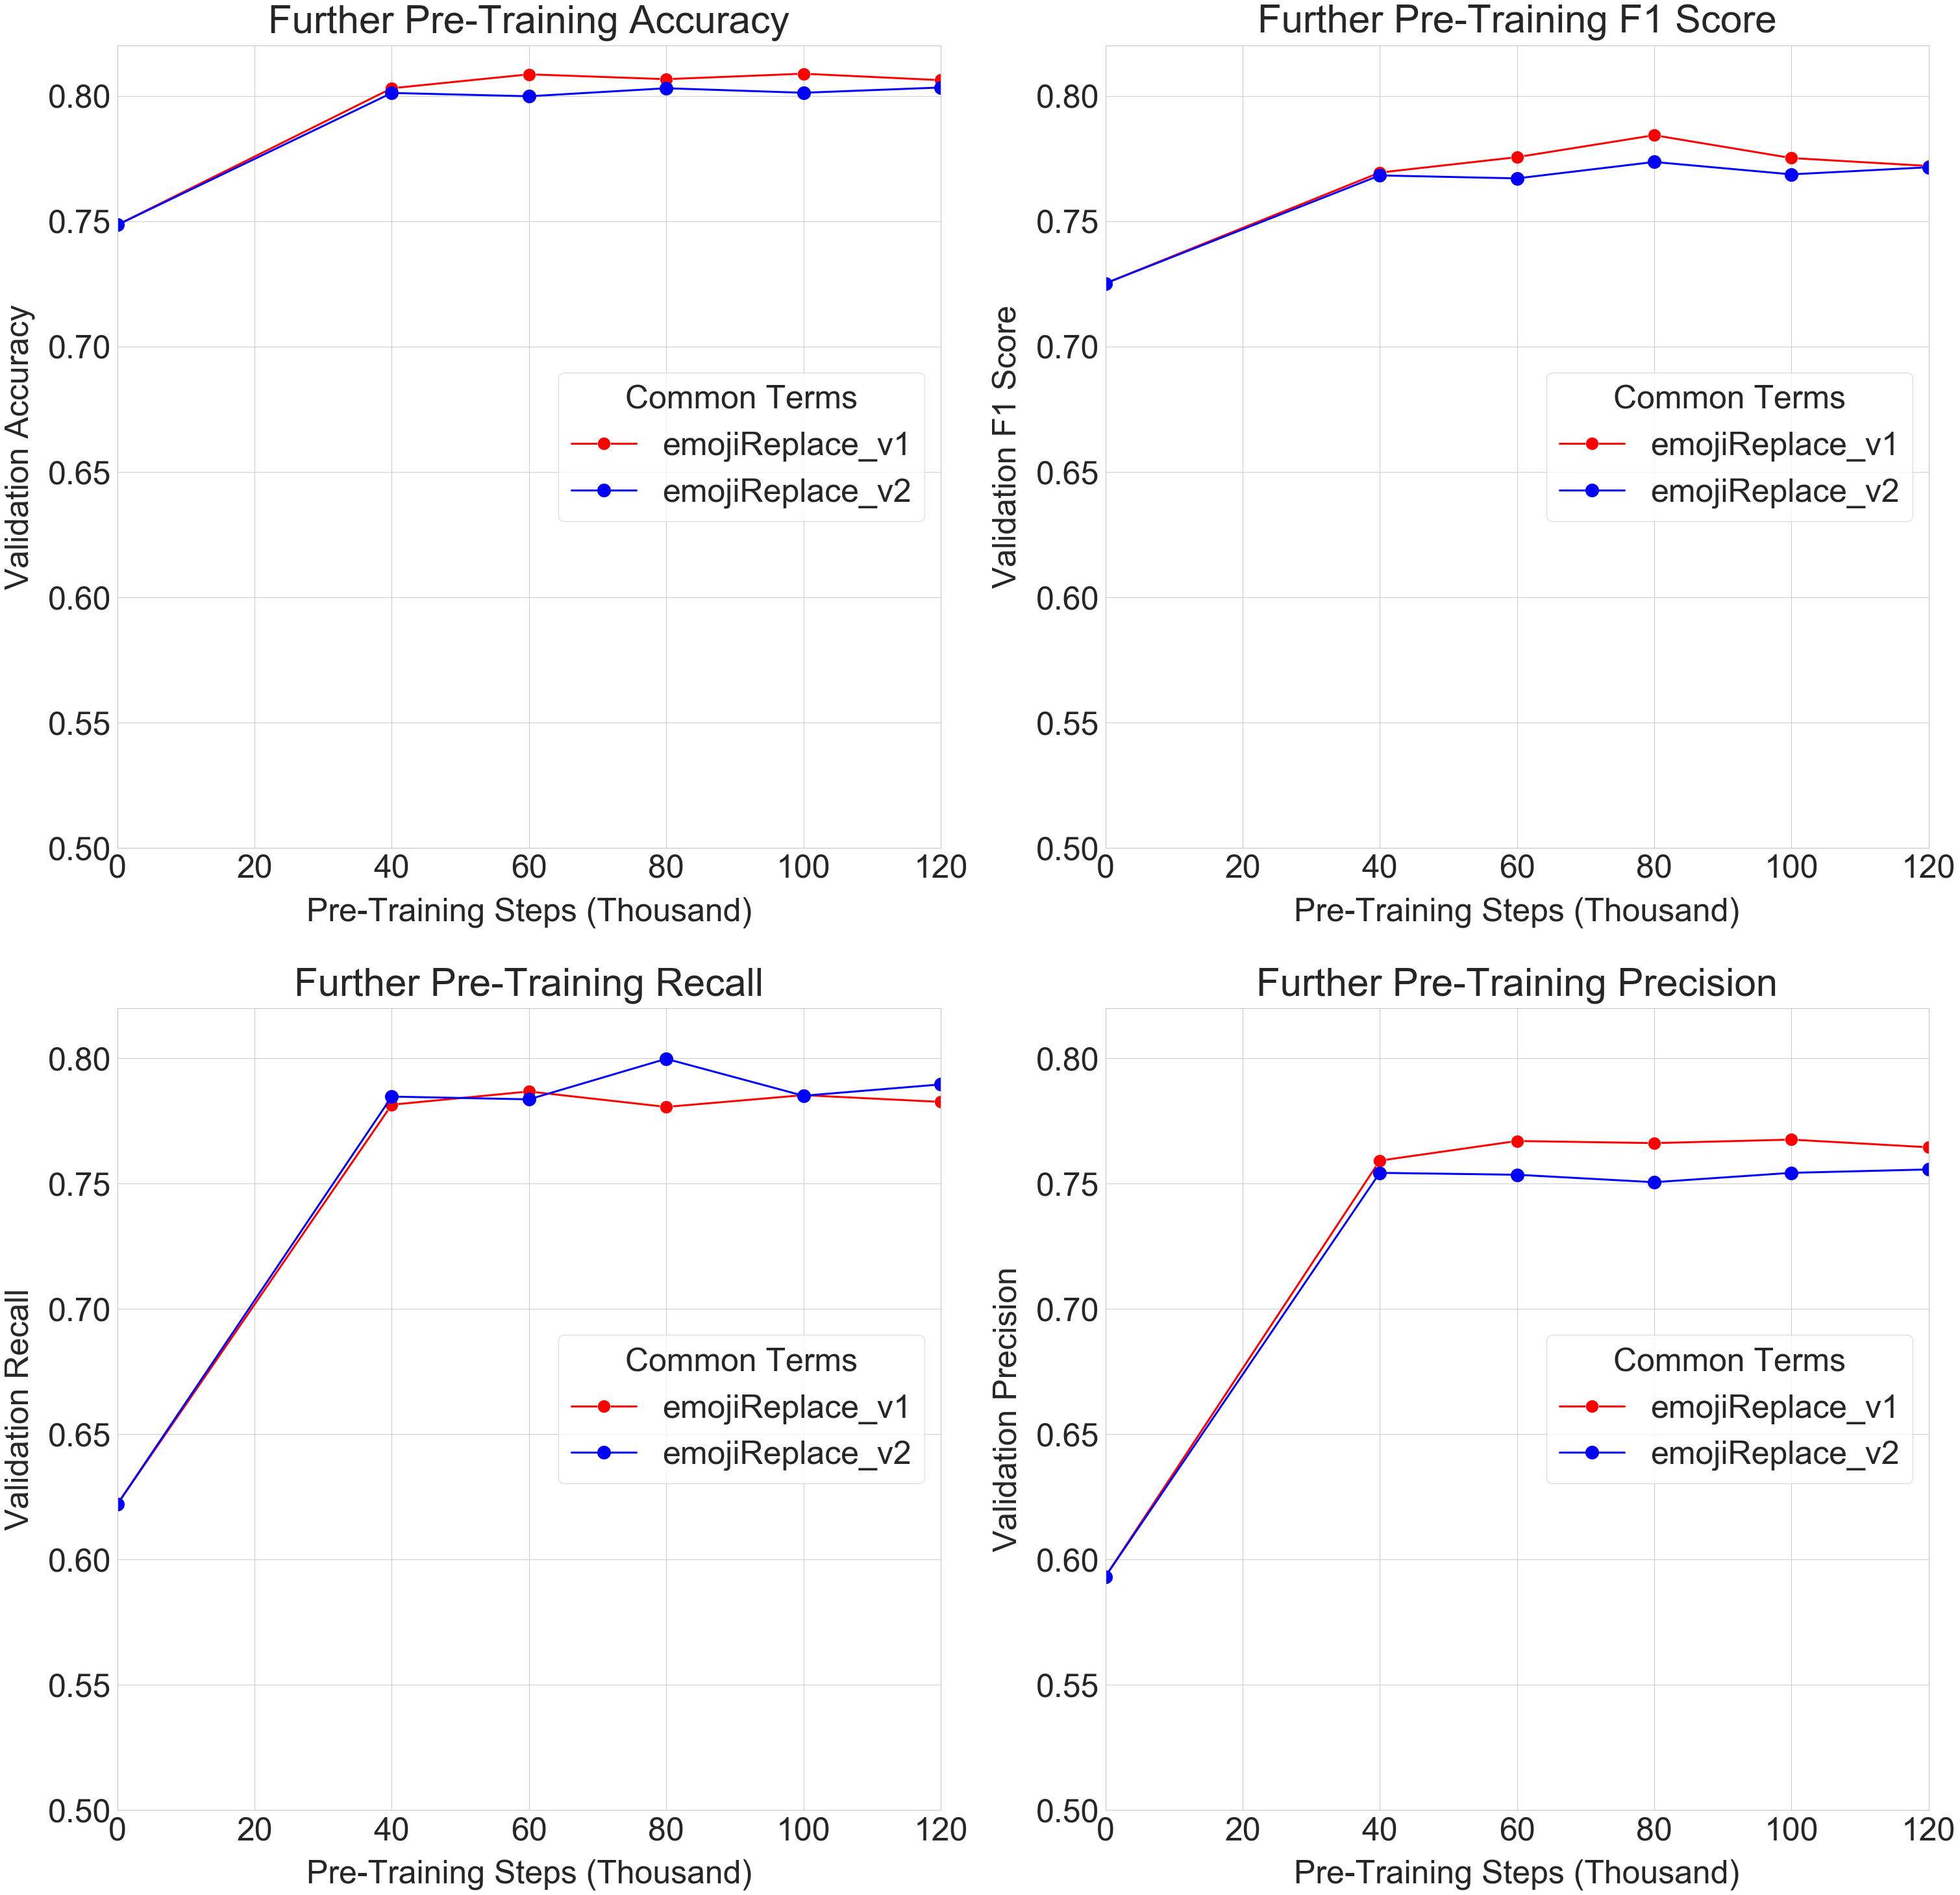

In [46]:
for i in range(1,len(metrics) + 1):
    plt.subplot(2,2,i)
    ax = sns.lineplot(x = noRemTerms.index, y = metrics[i-1],\
                      data = noRemTerms, marker = 'o', color = 'red')
    plt.title("Further Pre-Training " + metrics[i-1] , pad =padsize)
    plt.ylabel("Validation " + metrics[i-1], labelpad =padsize)
    plt.xlabel("Pre-Training Steps (Thousand)",labelpad =padsize)
    plt.ylim(0.5, 0.82)
    plt.xlim(0, 130)
    emoj[metrics[i-1]].plot(ax = ax, marker = 'o', color = 'blue')
    ax.legend(labels = ['emojiReplace_v1', 'emojiReplace_v2'], \
              title = 'Common Terms' ,prop = {'size': 50})
    
#fig = ax.get_figure()
#fig.savefig('output.png', bbox_inches ='tight')
plt.show()